# Generador de mapas

Código para generar mapas bonitos de alguna ciudad del mundo 🗺

-------------------------


Primero, instalamos OSMnx, que es un paquete de python que permite descargar datos geoespaciales desde OpenStreetMap. Hay que reinstalar matplotlib para que no de error asociado al importe de _png

In [1]:
%%capture
!pip install osmnx
!pip install matplotlib==3.1.3
import pandas as pd
import numpy as np
import osmnx as ox
import requests
import urllib.parse
import matplotlib.pyplot as plt

Primero, debemos ingresar el lugar que queremos mapear, en este caso, París, Francia.

In [2]:
place = 'Paris, France'

Luego, usando la API de OSM obtenemos la latitud y longitud del lugar

In [3]:

url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(place) +'?format=json'

response = requests.get(url).json()

lat = float(response[0]["lat"])
lon = float(response[0]["lon"])

point = (lat, lon)
print(point)


(48.8588897, 2.3200410217200766)


Creamos el mapa usando `point` para pasar los datos de longitud y latitud. Esto puede tardar un par de minutos.

In [4]:
G = ox.graph_from_point(point, dist=10000, retain_all=True, simplify = True, network_type='all')

Luego generamos u,v y key y data para iterar sobre los objetos de G. (Si alguna vez utilizaste networkx, esto quizá te resulte similar). Pero nos interesa principalmente el objeto `data`

In [5]:
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in G.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    

In [6]:
data[0]

{'osmid': 315818975,
 'name': 'Rue Henri Duvernois',
 'highway': 'residential',
 'maxspeed': '30',
 'oneway': False,
 'length': 8.707}

Creamos objetos para almacenar el color y el ancho de la línea que queremos asignarle a caminos y a carreteras

In [7]:
roadColors = []
roadWidths = []

In [8]:
for item in data:
    if "length" in item.keys():
        if item["length"] <= 100:
          # Asignamos ancho y color para caminos pequeños
            linewidth = 0.10
            color = "#a6a6a6" 
            
        elif item["length"] > 100 and item["length"] <= 200:
          # Ancho levemente mayor para caminos entre length de 100 y 200
            linewidth = 0.15
            color = "#666666"
            
        elif item["length"] > 200 and item["length"] <= 400:

          # mayor ancho para caminos más largos
          
            linewidth = 0.25
            color = "#4d4d4d"
            
            
        elif item["length"] > 400 and item["length"] <= 800:
            color = '#000000'
            linewidth = 0.35
        else:
            color = "#000000"
            linewidth = 0.45
    else:
        color = "#a6a6a6"
        linewidth = 0.10

    roadColors.append(color)
    roadWidths.append(linewidth)

Asignamos el color de fondo que queremos para el mapa

In [9]:
bgcolor = "#ffffff"

Creamos figura y ploteamos el mapa. Esto también puede tardar un poco.

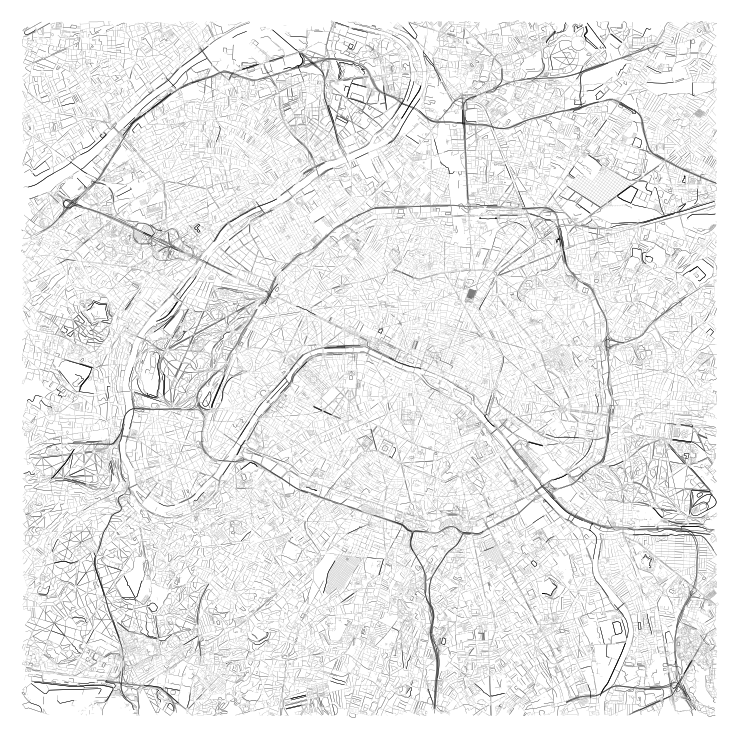

In [10]:
fig, ax = ox.plot_graph(G, node_size=0,figsize=(13, 20), 
                        dpi = 300,
                        bgcolor = bgcolor,
                        save = False, 
                        edge_color=roadColors,
                        edge_linewidth=roadWidths, 
                        edge_alpha=1)

fig.tight_layout(pad=0)

Guardamos el mapa 🗺

In [ ]:
fig.savefig("output/paris.pdf", dpi=300, bbox_inches='tight', format="pdf", facecolor=fig.get_facecolor(), transparent=False)